# Programming Exercise 4:
Neural Networks Learning

In [1]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score
import math
import scipy.io
from scipy.special import expit, logit

In [2]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

# Part 1: Loading and Visualizing Data 

In [3]:
from math import floor, sqrt, ceil


def DisplayData(X, example_width = None):
    
    plt.figure(figsize=(8,8))
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))

    # Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(sqrt(X.shape[1])))

    plt.set_cmap("gray")
    
    m, n = X.shape
    
    example_height = int(n / example_width)
    display_rows = int(ceil(sqrt(m)))
    display_cols = int(ceil(m / display_rows))
    pad = 1

    # Setup blank display
    s = pad + display_rows * (example_height + pad)
    t = pad + display_cols * (example_width + pad)
    display_array = -np.ones((s,t))
    curr_ex = 0
    
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break
            max_val = max(abs(X[curr_ex, :]))            
            a = pad + j * (example_height + pad) + np.array(range(example_height+1))
            b = pad + i * (example_width + pad) + np.array(range(example_width+1))

            display_array[a[0]:a[-1], b[0]:b[-1]] = np.reshape(X[curr_ex, :],
                                                               (example_height, example_width),
                                                               order="F") / max_val
            curr_ex += 1
            
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    plt.axis('off')
    
    return h, display_array

In [4]:
mat = scipy.io.loadmat('ex4data1.mat')

X = mat['X']
y = mat['y']

m, n = X.shape, y.shape
X.shape

(5000, 400)

(<matplotlib.image.AxesImage at 0x1fde93e9eb8>,
 array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        ...,
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]))

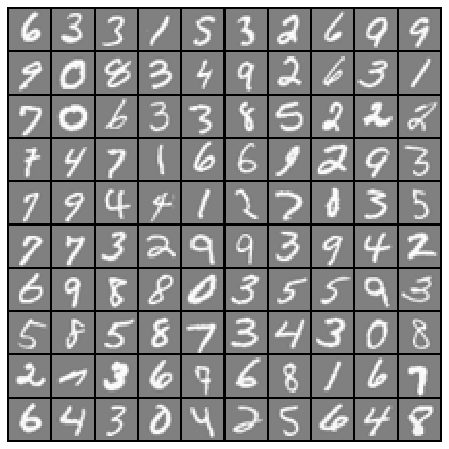

In [5]:
sel = np.random.permutation(m[0])
sel = sel[:100]
DisplayData(X[sel, :])

# Part 2: Loading Parameters

In [6]:
print('\nLoading Saved Neural Network Parameters ...\n')


Loading Saved Neural Network Parameters ...



In [7]:
# Load the weights into variables Theta1 and Theta2
load = scipy.io.loadmat('ex4weights.mat')
theta1 = load['Theta1']
theta2 = load['Theta2']
print("theta1: ",theta1.shape, "\ntheta2: ",theta2.shape)

theta1:  (25, 401) 
theta2:  (10, 26)


In [8]:
#theta1 = np.hstack(theta1.flatten())
theta1 = theta1.flatten()
theta2 = theta2.flatten()
m, n = theta1.shape[0], theta2.shape[0]
theta1 = theta1.reshape((m, 1))
theta2 = theta2.reshape((n, 1))

In [9]:
nn_params = np.r_[theta1, theta2]
nn_params.shape

(10285, 1)

# Part 3: Compute Cost (Feedforward)

In [10]:
nn_params[0:hidden_layer_size * (input_layer_size + 1)].shape

(10025, 1)

In [11]:
def sigmoid(z):
    
    g = np.zeros(z.shape)
    g = expit(z)

    return g

In [12]:
def suma(X, y, h, num_labels):
    
    m = X.shape[0]
    y_ = np.zeros((m,num_labels))
    dis = np.zeros((m,1))
  
    cost = 0
    
    for i in range(m):
        y_[i, y[i]-1] = 1
        t = np.log(h[i])
        s = y_[i]
        cost += np.dot(t,-s) - np.dot(np.log(1-h[i]),(1-s))

    return cost
        
#*******************************************#        
    
        
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lambda_):
    
    Theta1 = nn_params[0:hidden_layer_size * (input_layer_size + 1)]
    Theta1 = Theta1.reshape((hidden_layer_size,input_layer_size + 1))
    
    Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):]
    Theta2 = Theta2.reshape((num_labels,hidden_layer_size + 1 ))
    
    m = X.shape[0]
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    t = 1/m
    u = lambda_/(2*m)
    
    a1 = np.c_[np.ones((m,1)), X] 
    a2 = np.c_[np.ones((m,1)), sigmoid(np.dot(a1,Theta1.T))]
    h = sigmoid(np.dot(a2, Theta2.T))
    
    
    r = Theta1[:,1:]
    s = Theta2[:,1:]
    
    Theta1_reg = np.sum(np.sum(r**2))
    Theta2_reg = np.sum(np.sum(s**2))
    
    J = t*suma(X, y, h, num_labels) + u*(Theta1_reg+Theta2_reg)
    
    #IMPLEMENTACION DE BACKPROPAGATION
    
    
    
    
    return J
    


In [13]:
lambda_ = 0
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): {} '\
      '\n(this value should be about 0.287629)\n'.format(J))

Cost at parameters (loaded from ex4weights): 0.28762916516131876 
(this value should be about 0.287629)



# Part 4: Implement Regularization

In [14]:
print('\nChecking Cost Function (w/ Regularization) ... \n')

lambda_ = 1;

J = nnCostFunction(nn_params,
                   input_layer_size, 
                   hidden_layer_size,
                   num_labels, 
                   X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): {} \n(this value should be about 0.383770)'.format(J))



Checking Cost Function (w/ Regularization) ... 

Cost at parameters (loaded from ex4weights): 0.3837698590909235 
(this value should be about 0.383770)


# Part 5: Sigmoid Gradient

In [15]:
def sigmoidGradient(z):
    
    g = sigmoid(z)*(1 - sigmoid(z))
    
    return g

In [16]:
print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]))
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print(g)


Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


# Part 6: Initializing Pameters

In [17]:
def randInitializeWeights(L_in, L_out):
    W = np.zeros((L_out, 1 + L_in))
    epsilon_init = 0.12
    
    W = np.random.rand(L_out, 1 + L_in)*(2*epsilon_init) - epsilon_init
    
    return W

In [18]:
print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)


initial_Theta1 = initial_Theta1.flatten()
initial_Theta2 = initial_Theta2.flatten()

# Unroll parameters
initial_nn_params = np.r_[initial_Theta1 , initial_Theta2]

initial_nn_params = initial_nn_params.reshape((initial_nn_params.shape[0],1))

print(initial_nn_params.shape)


Initializing Neural Network Parameters ...

(10285, 1)


# Part 7: Implement Backpropagation

In [19]:
def debugInitializeWeights(fan_out, fan_in):
    
    W = np.zeros((fan_out, fan_in + 1))
    
    W = np.reshape(np.sin(range(W.size)), W.shape) / 10
    
    return W
    
def computeNumericalGradient(J, theta):
    
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4
    
    for p in range(theta.size):
        
        perturb.reshape(perturb.size, order="F")[p] = e
        loss1 = J(theta - perturb)
        loss2 = J(theta + perturb)
        numgrad.reshape(numgrad.size, order="F")[p] = (loss2 - loss1) / (2*e)
        perturb.reshape(perturb.size, order="F")[p] = 0
        
    return numgrad


def checkNNGradients(lambda_ = 0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5


    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
    X  = debugInitializeWeights(m, input_layer_size - 1)
    y = 1 + np.mod(range(m), num_labels)
    
    nn_params = np.r_[Theta1.flatten(order="F"), Theta2.flatten(order="F")]
    
    #costFunc = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
     #              num_labels, X, y, lambda_)
    
    costFunc = lambda p: nnCostFunction(p, input_layer_size,
                             hidden_layer_size,
                             num_labels,
                             X, y,
                             lambda_)
    
    
    
    grad = costFunc(nn_params)
    
    numgrad = computeNumericalGradient(costFunc, nn_params)
    


In [20]:
print('\nChecking Backpropagation... \n')
checkNNGradients()


Checking Backpropagation... 



# Part 8: Implement Regularization

In [21]:
print('\nChecking Backpropagation (w/ Regularization) ... \n')

#%  Check gradients by running checkNNGradients
lamb = 3
checkNNGradients(lamb)

#% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params,
                          input_layer_size,
                          hidden_layer_size,
                          num_labels,
                          X, y,
                          lamb)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = {}): {} \n(for lambda = 3, this value should be about 0.576051)\n\n'.format(lamb, debug_J))

print('Program paused. Press enter to continue.\n')



Checking Backpropagation (w/ Regularization) ... 



Cost at (fixed) debugging parameters (w/ lambda = 3): 0.5760512469501329 
(for lambda = 3, this value should be about 0.576051)


Program paused. Press enter to continue.



# Part 8: Training NN

In [22]:
from multiprocessing import Pool
import multiprocessing
from scipy import optimize

In [23]:

# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.fmin_cg.html

In [24]:
print('\nTraining Neural Network... \n')


    #  After you have completed the assignment, change the MaxIter to a larger
    #  value to see how more training helps.
    #options = optimset('MaxIter', 50)

    #  You should also try different values of lambda
lamb = 1

    # Create "short hand" for the cost function to be minimized
costFunc = lambda p: nnCostFunction(p,
                                    input_layer_size,
                                    hidden_layer_size,
                                    num_labels,
                                    X, y,
                                    lamb)

    # Now, costFunction is a function that takes in only one argument (the
    # neural network parameters)
opts = {'maxiter' : 50,
        'disp' : True,
        'gtol' : 1e-5,
        'norm' : np.inf,
        'eps' : 1.4901161193847656e-08}


    # nn_params, cost, usar fmin_cg o minimize
result = optimize.minimize(costFunc,
                            initial_nn_params,
                            method = 'CG',
                            options = opts)

    #Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end),
    #                 num_labels,
    #                 (hidden_layer_size + 1)

print('Program paused. Press enter to continue.\n')
    
    
    


Training Neural Network... 



KeyboardInterrupt: 

In [ ]:
# Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)),
                 hidden_layer_size,
                (input_layer_size + 1))
Theta1

# Part 9: Visualize Weights

In [ ]:
print('\nVisualizing Neural Network... \n')
displayData(Theta1[:, 2:end])

print('\nProgram paused. Press enter to continue.\n')

# Part 10: Implement Predict

In [ ]:
def predict(Theta1, Theta2, X):
    
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    # You need to return the following variables correctly 
    p = np.zeros((m, 1))
    
    

In [ ]:
########pred = predict(Theta1, Theta2, X)
########print('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100)
